In [138]:
import seaborn as sns
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt

## Exercises 1

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
62,6.0,2.2,4.0,1.0,versicolor
65,6.7,3.1,4.4,1.4,versicolor
23,5.1,3.3,1.7,0.5,setosa
33,5.5,4.2,1.4,0.2,setosa
85,6.0,3.4,4.5,1.6,versicolor
97,6.2,2.9,4.3,1.3,versicolor
18,5.7,3.8,1.7,0.3,setosa
13,4.3,3.0,1.1,0.1,setosa
11,4.8,3.4,1.6,0.2,setosa
101,5.8,2.7,5.1,1.9,virginica


In [10]:
data('iris', show_doc = True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

### 1. What does the distribution of petal lengths look like?

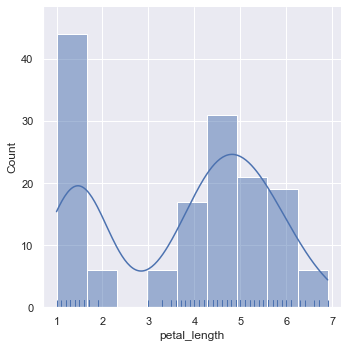

In [230]:
sns.displot(iris.petal_length, kde = True, rug = True)

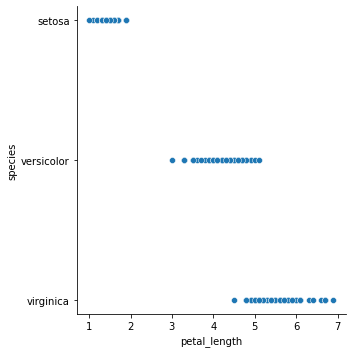

In [104]:
sns.relplot(data = iris, x = 'petal_length', y = 'species')

<AxesSubplot:xlabel='species', ylabel='petal_length'>

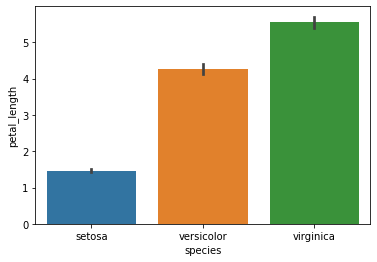

In [18]:
sns.barplot(data = iris, x = 'species', y = 'petal_length')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


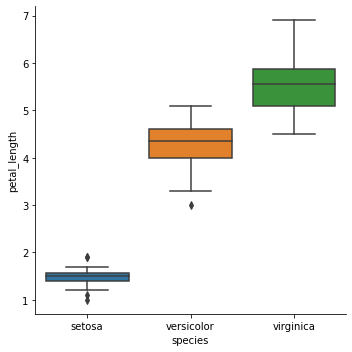

In [95]:
sns.catplot(data = iris, x = 'species', y = 'petal_length', kind = 'box', size = 5)

### 2. Is there a correlation between petal length and petal width? 

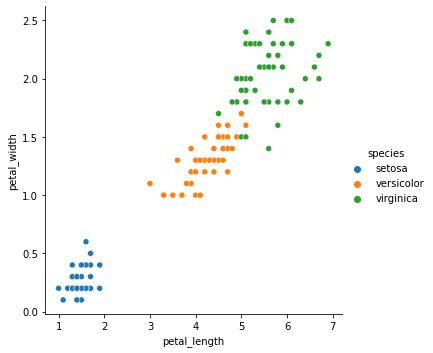

In [105]:
sns.relplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species')

# Yes, there is a correlation between the petals length and their width. At approx 85 to 90%,
# petal length increase corresponds to increase in petal witdth and it is at a different proportion,
# depending on the species although versicolor is closer to virginica

### 3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

In [21]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.2,4.1,1.5,0.1,setosa
127,6.1,3.0,4.9,1.8,virginica
78,6.0,2.9,4.5,1.5,versicolor
105,7.6,3.0,6.6,2.1,virginica
148,6.2,3.4,5.4,2.3,virginica
40,5.0,3.5,1.3,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
104,6.5,3.0,5.8,2.2,virginica
138,6.0,3.0,4.8,1.8,virginica
130,7.4,2.8,6.1,1.9,virginica


In [22]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

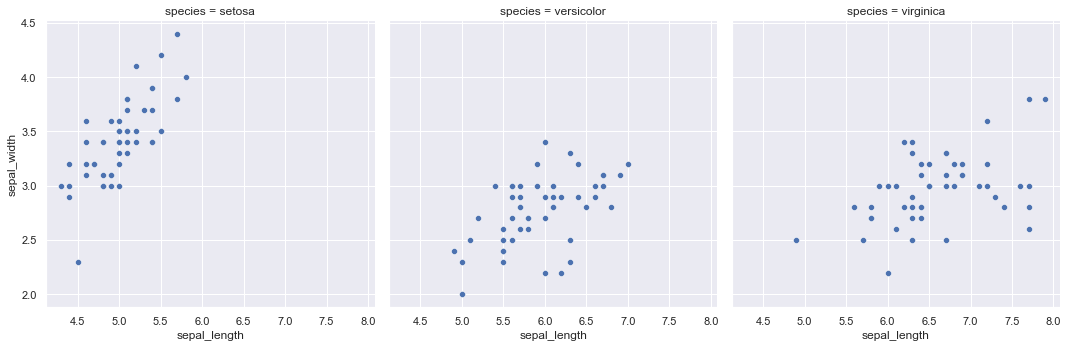

In [218]:
sns.relplot(x='sepal_length', y='sepal_width', col='species', data=iris)

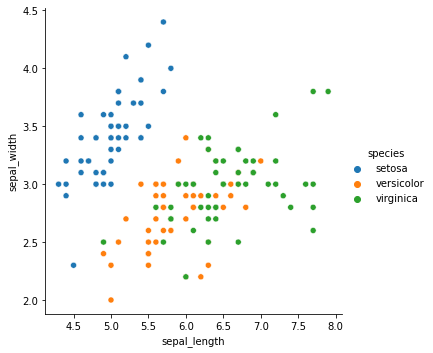

In [107]:
sns.relplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'species')

# The correlation in sepal_length and sepal_width is much lower but still fairly
# distinct between setosa on one side and versicolor and virginica on the other side

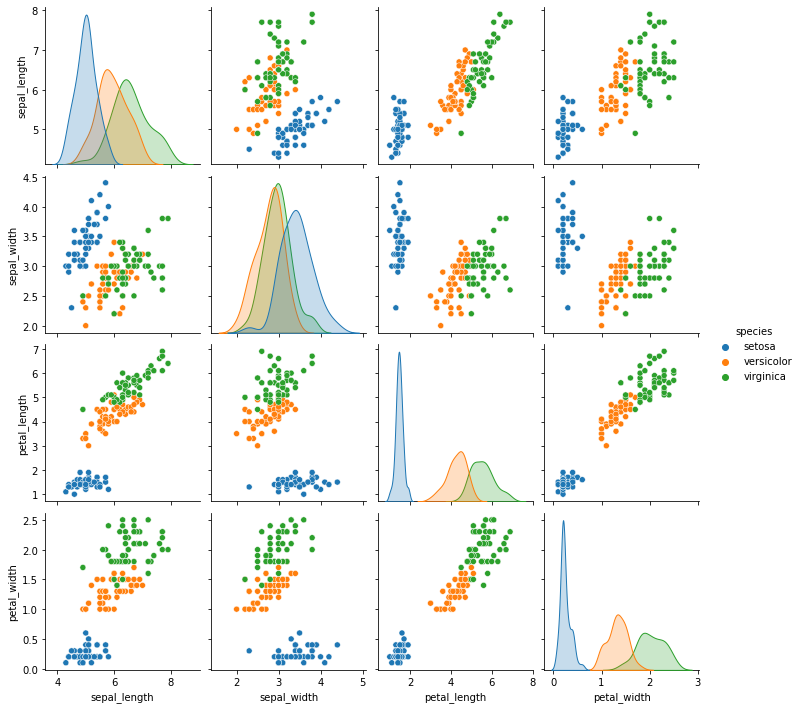

In [108]:
sns.pairplot(iris, hue = 'species')

### 4. Which features would be best used to predict species?

- The petal width and their length seems to be the best way to distinguish these species from each other

## Exerscises 2

### 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [33]:
anscombe = sns.load_dataset('anscombe')

In [167]:
data('anscombe', show_doc = True)

anscombe

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Anscombe's Quartet of ‘Identical’ Simple Linear Regressions

### Description

Four _x_-_y_ datasets which have the same traditional statistical properties
(mean, variance, correlation, regression line, etc.), yet are quite different.

### Usage

    anscombe

### Format

A data frame with 11 observations on 8 variables.

x1 == x2 == x3

the integers 4:14, specially arranged

x4

values 8 and 19

y1, y2, y3, y4

numbers in (3, 12.5) with mean 7.5 and sdev 2.03

### Source

Tufte, Edward R. (1989) _The Visual Display of Quantitative Information_,
13–14. Graphics Press.

### References

Anscombe, Francis J. (1973) Graphs in statistical analysis. _American
Statistician_, **27**, 17–21.

### Examples

    require(stats); require(graphics)
    summary(anscombe)
    ##-- now some "magic" to do the 4 regressions in a loop:
    ff <- y ~ x
    mods <- setNames(as.list(1:4), paste0("lm", 1:4))
 

In [34]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [38]:
anscombe.columns

Index(['dataset', 'x', 'y'], dtype='object')

In [39]:
anscombe.shape

(44, 3)

In [109]:
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [125]:
type(anscombe)

pandas.core.frame.DataFrame

In [ ]:
sns.relplot(data= anscombe, x='x', y='y', col = 'dataset')

In [ ]:
sns.lmplot(data= anscombe, x='x', y='y', col = 'dataset') #line plot on a 2 dimensional plane

In [128]:
summary = anscombe.groupby('dataset').describe().T
summary

dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000

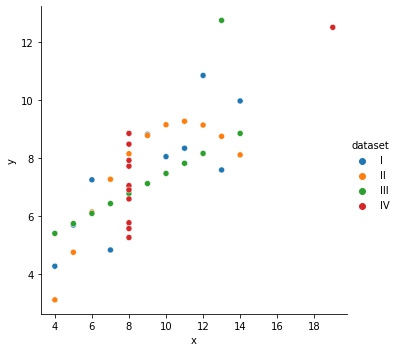

In [127]:
sns.relplot(data = anscombe, x = 'x', y = 'y', hue = 'dataset')

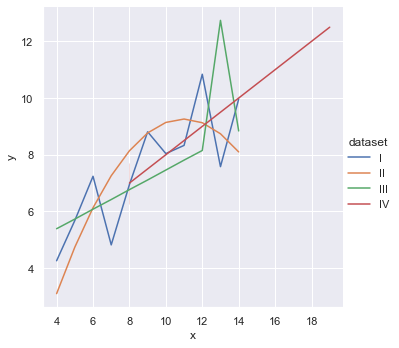

<Figure size 2160x1512 with 0 Axes>

In [142]:
sns.set_theme()
sns.relplot(data = anscombe, x = 'x', y = 'y', kind = 'line', hue = 'dataset')
fig = plt.figure(figsize = (30, 21)) # Why isn't this working?

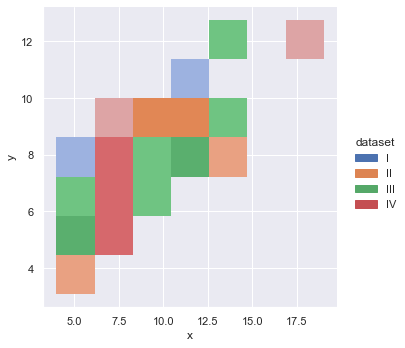

In [231]:
sns.displot(data=anscombe, x='x', y='y', hue='dataset')

### 2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [168]:
insp = data('InsectSprays')

In [165]:
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [232]:
insp.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


<AxesSubplot:xlabel='spray', ylabel='count'>

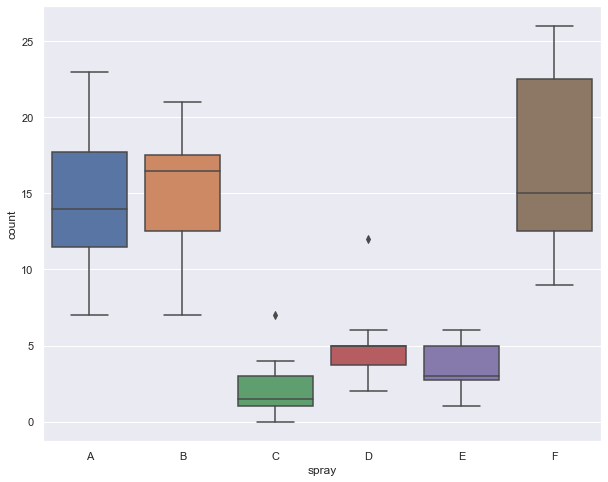

In [174]:
plt.figure(figsize = (10, 8))


sns.boxplot(data = insp, x = 'spray', y = 'count')
# Insecticides A, B, and F seem to be the most efficient ones

### 3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:
- Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
- Does whether or not a province is Catholic influence fertility?
- What measure correlates most strongly with fertility?

In [207]:
swiss = data('swiss')
type(swiss)

pandas.core.frame.DataFrame

In [176]:
data('swiss', show_doc = True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [177]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [ ]:
# swiss = swiss.groupby('Index', as_index=False).set_index([swiss.Index([2, 3, 4, 5]), 'year'])

In [188]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [208]:
swiss.columns

Index(['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic',
       'Infant.Mortality'],
      dtype='object')

In [233]:
swiss['is_catholic'] = swiss.Catholic > 50

In [234]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

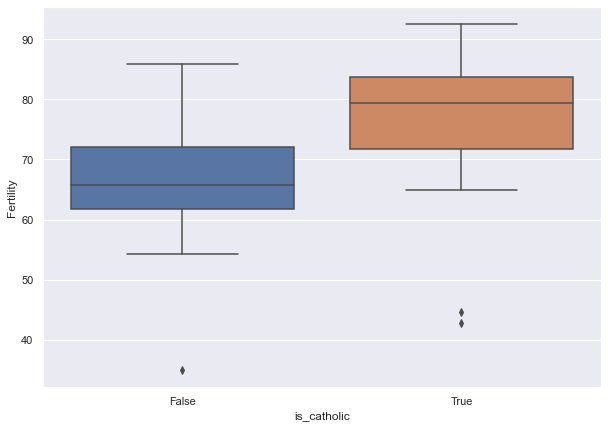

In [243]:
plt.figure(figsize = (10,7))

sns.boxplot(data = swiss, x = 'is_catholic', y = 'Fertility')
# there seems to be a correlation between a province beeing Catholic and the level of fertility

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

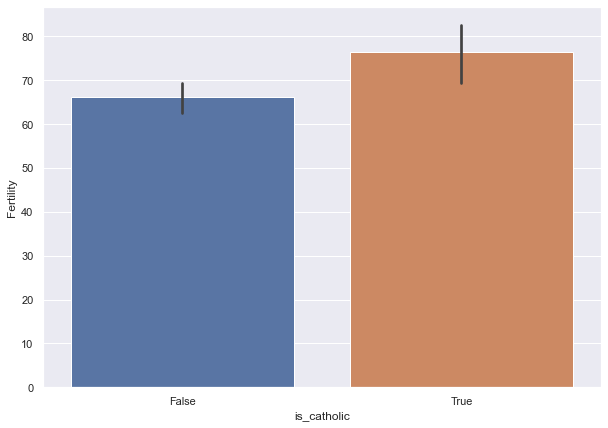

In [251]:
plt.figure(figsize = (10,7))

sns.barplot(data = swiss, x = 'is_catholic', y = 'Fertility')
# The figure below does not give more information than the previous one.

In [ ]:
plt.figure(figsize = (10,7))

# first subplot
plt.subplot(221)
sns.boxplot(data = swiss, x = 'is_catholic', y = 'Fertility')

# Second subplot
plt.subplot(222)
sns.boxplot(data = tips, y = 'tip')

#third subplot
plt.subplot(223)
sns.scatterplot(data = tips, y = 'tip', x = 'total_bill')


# 4th subplot
plt.subplot(224)
sns.boxplot(data = tips, y = 'tip', x = 'sex', hue = 'time')

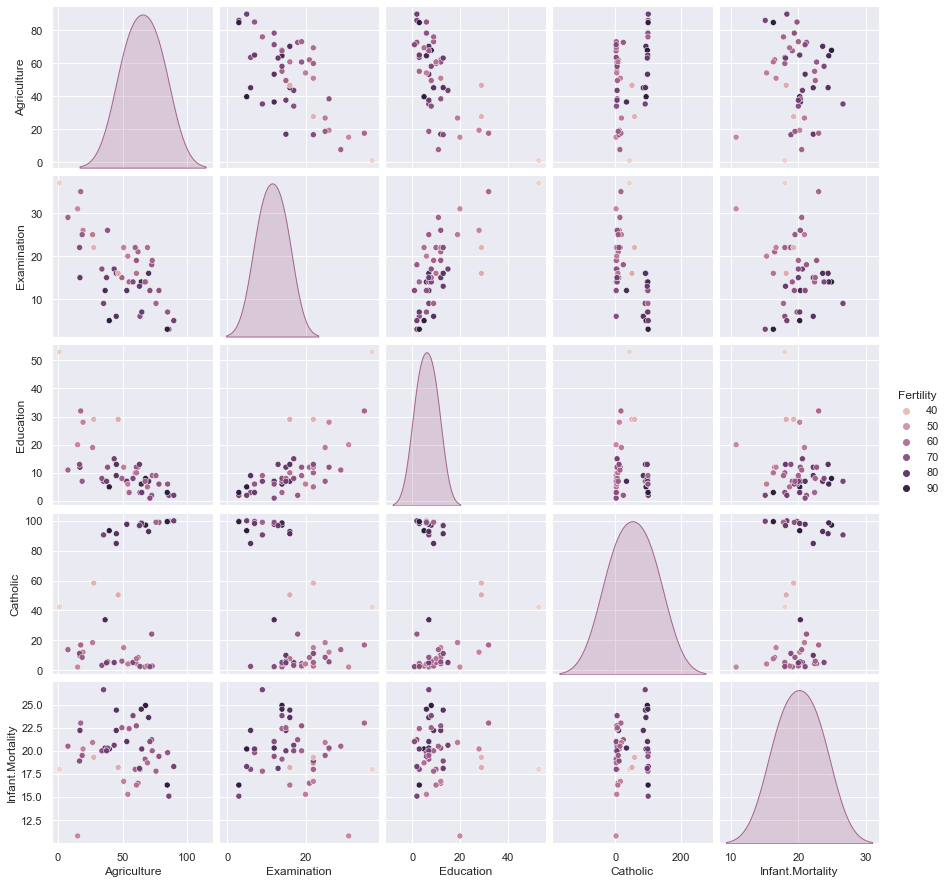

In [259]:
sns.pairplot(data = swiss.iloc[:, :-1], hue = 'Fertility')
# The trend seems a little unclear although examination, education and catholic are the most pronounced.

In [260]:
# To follow anscombe advice I will look at the data itself
swiss.corr().Fertility
# This confirms some of the trends I noticed: examination and education for a negative trend,
# and catholic and infant mortality for a lower but positive correlation.

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.402813
Name: Fertility, dtype: float64

### 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [270]:
def get_db_url(db):
    from env import user, password, host
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [269]:
url = get_db_url('chipotle')
query = "SELECT * FROM orders"
oc = pd.read_sql(query, url)
oc.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [271]:
oc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


In [279]:
oc['item_price'] = oc.item_price.astype('float')
oc.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [280]:
best_sellers = oc.groupby('item_name').quantity.sum().nlargest(4)
best_sellers

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [285]:
# Indexing seems necessary otherwise it is not possible to access the best sellers items and price
oc[oc.item_name.isin(best_sellers.index)].head()

,id,order_id,quantity,item_name,choice_description,item_price
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",11.75
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25
10,11,5,1,Chips and Guacamole,nan,4.45


In [288]:
revenue = oc[oc.item_name.isin(best_sellers.index)].groupby('item_name').item_price.sum()
revenue

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Chips and Guacamole    2201.04
Steak Burrito          3851.43
Name: item_price, dtype: float64

In [290]:
revenue = revenue.sort_values(ascending = False).reset_index()
revenue

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Chips and Guacamole,2201.04


Text(0.5, 0, 'Gross Revenue')

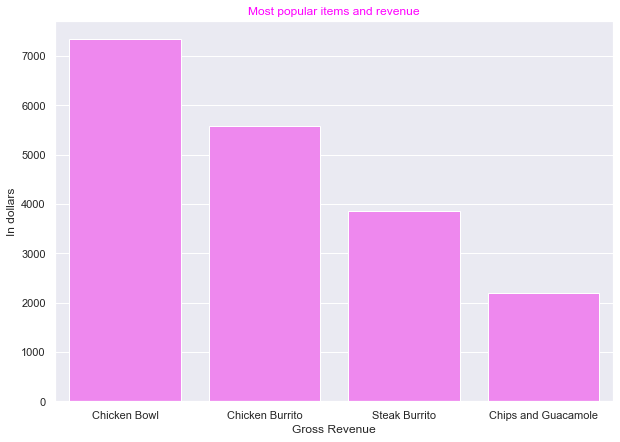

In [295]:
plt.figure(figsize = (10, 7))
sns.barplot(x = 'item_name',
            y = 'item_price',
            data = revenue,
            palette=['#ff77ff'])

plt.title('Most popular items and revenue', fontdict={'color': '#ff00ff'})

plt.ylabel("In 000 of dollars")
plt.xlabel("Gross Revenue")

### 5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [296]:
sleeps = data('sleepstudy')


In [301]:
sleeps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [303]:
# To make the graph more readable it is necessary to change the header of the column 'Subject'
sleeps['Subject'] = 'Subject_' + sleeps.Subject.astype(str)

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

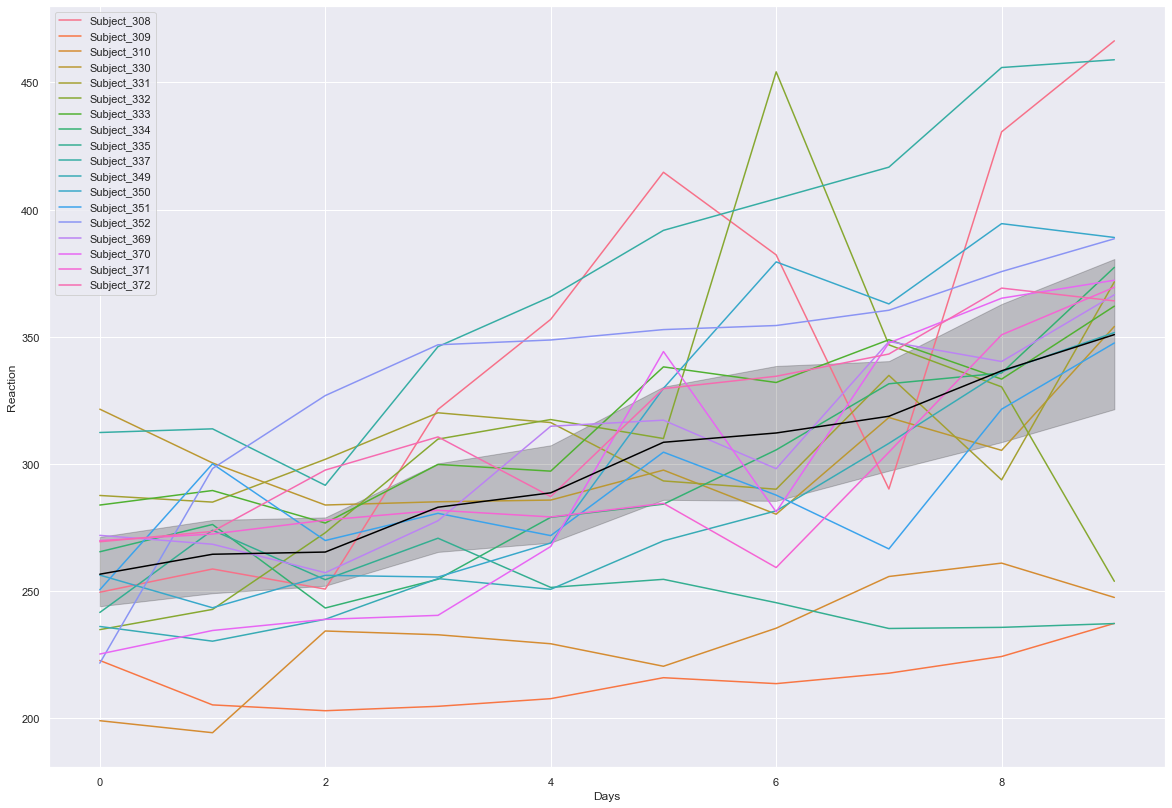

In [306]:
plt.figure(figsize=(20, 14))

sns.lineplot(data = sleeps, x = 'Days', y = 'Reaction',  hue = 'Subject')
sns.lineplot(data = sleeps, x = 'Days', y = 'Reaction', color = 'black') 
# This last line darkens the mean line to help distinguish between the mean and the other values